### TAREA 2 cosmologia
Alejandro Gutierrez

20677580-7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import camb

## P4

Resolviendo ecuaciones perturvadas para materia

In [8]:
# Constantes
H0 = 67 # km/(s*Mpc)
omat = 0.3 # Omega_m,0
orad = 10**-4 # Omega_r,0
ode = 1 - omat - orad  

In [9]:
# funciones
def H(a):
    r = (orad*a**-4 + omat*a**-3 + ode*a**-3)
    return np.sqrt(r)*H0 

In [14]:
# arrays
k_arr = [H0, 5*H0, 20*H0, 200*H0]

In [72]:
def sistema(a, Y, k):
    d, o = Y  # Y = [d(a), o(a)] = [delta(a),theta(a)]
    denominador = (1 + 9*omat*H0**2/(2*a*k**2)) 
    dddx = ((9*omat*d*H0**2)/(2*(k*a)**2) - o/(H(a)*a**2))/denominador
    dodx = -o/a - 3*omat*d*H0**2 / (2*H(a)*a**3)
    return [dddx, dodx]

# Condiciones iniciales
d0 = 10**-5
o0 = 0

a_span = (10**-4, 1)
a_eval = np.linspace(10**-4, 1, 500)
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))

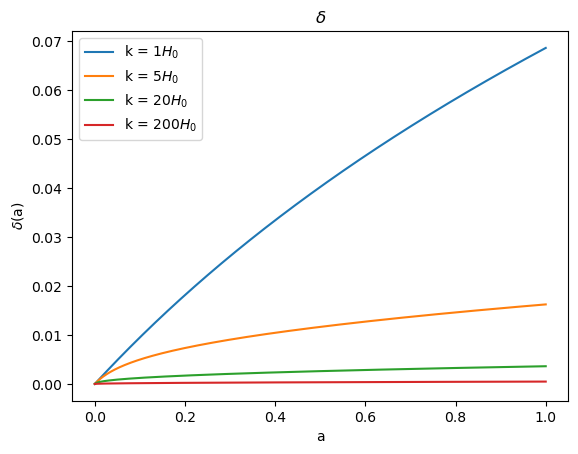

In [73]:
plt.xlabel("a")
plt.ylabel(r"$\delta$(a)")
plt.title(r"$\delta$")
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))
    plt.plot(sol.t, sol.y[0], label=f'k = {int(i/H0)}$H_{0}$')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

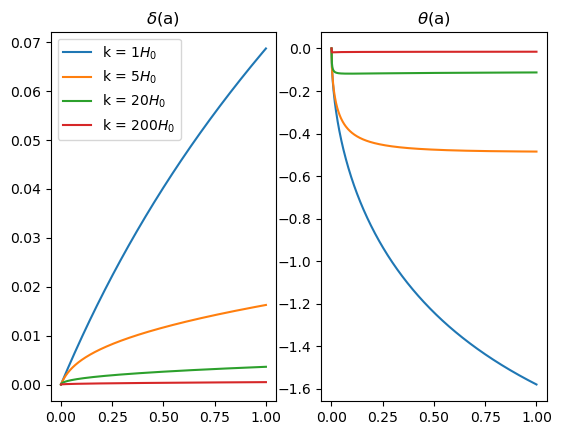

In [74]:
fig, ax = plt.subplots(1,2)
ax[0].set_title(r"$\delta$(a)")
ax[1].set_title(r"$\theta$(a)")
for i in k_arr:
    sol = solve_ivp(sistema, a_span, [d0, o0], t_eval=a_eval, args=(i,))
    ax[0].plot(sol.t, sol.y[0], label=f'k = {int(i/H0)}$H_{0}$')
    ax[1].plot(sol.t, sol.y[1], label=f'k = {int(i/H0)}$H_{0}$')
ax[0].legend()
#ax[1].legend()
plt.show

Se aprecia como las perturvaciones de materia solo crecen si el k es suficientemente pequeño,

es decir si son suficientemente grandes.

No hace mucho sentido pues todas las pequeñas deberian crecer y las mayores al horizontes causal no, 

pero es lo que obtengo :c 

## P5

Matter Power Spectrum

In [103]:
H0 = 67 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

In [104]:
# en set_cosmology se setea la masa de neutrinos =0
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk,mnu=0,num_massive_neutrinos=0)
pars.set_dark_energy(w=-1);

Se usan 2 metodos, solo para comparar

In [105]:
zmax = 250
zmin = 0

redshifts = np.arange(zmin,zmax,zmax//5)

pars.set_matter_power(redshifts=redshifts,kmax=1)

results = camb.get_results(pars)

kh,z,pk = results.get_linear_matter_power_spectrum(hubble_units=True,k_hunit=True)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 1.0, '$H_0$: 67.0 $\\frac{km/s}{Mpc}, $ $w$: -1.0, $c_s^2$: 1.0')

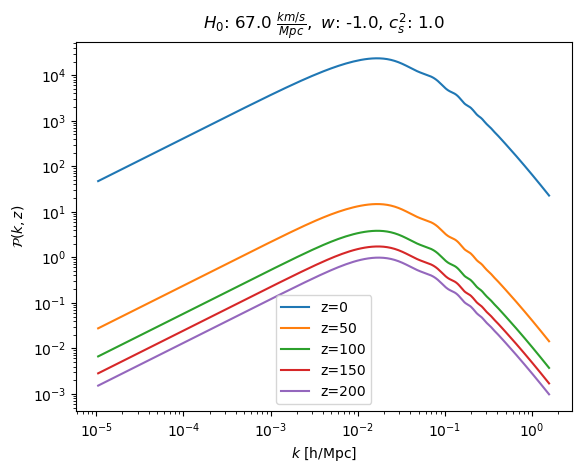

In [106]:
for iz, redshifts in enumerate(redshifts):
    plt.loglog(kh,pk[iz,:], label=f"z={redshifts}")
plt.legend()
plt.ylabel(r"$\mathcal{P}(k, z)$")
plt.xlabel(r"$k$ [h/Mpc]")
plt.title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")

In [107]:
zmax = 250
zmin = 0

redshifts = np.arange(zmin,zmax,zmax//5)
pars.NonLinear = camb.model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts,kmax=1)
results = camb.get_results(pars)
kh_nl,z_nl,pk_nl = results.get_matter_power_spectrum(minkh=1e-4)

Note: redshifts have been re-sorted (earliest first)


Text(0.5, 1.0, '$H_0$: 67.0 $\\frac{km/s}{Mpc}, $ $w$: -1.0, $c_s^2$: 1.0')

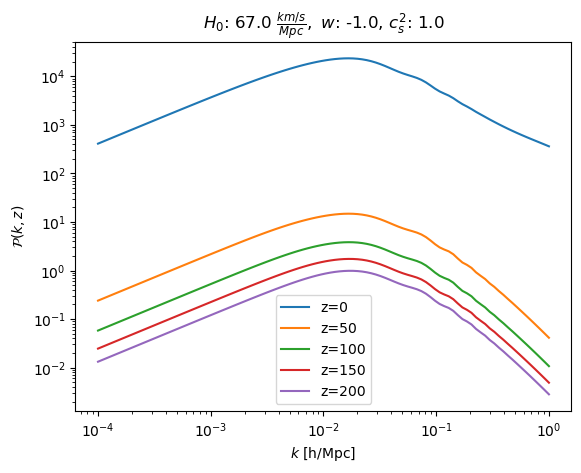

In [108]:
for iz, redshifts in enumerate(redshifts):
    plt.loglog(kh_nl,pk_nl[iz,:], label=f"z={redshifts}")
plt.legend()
plt.ylabel(r"$\mathcal{P}(k, z)$")
plt.xlabel(r"$k$ [h/Mpc]")
plt.title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f" $w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")

Efectos no lineales

In [114]:
redshifts = [10, 5, 1, 0]
# set non-linear Matter Power Spectrum
pars.NonLinear = camb.model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh_nl, z_nl, PK_nl = results.get_matter_power_spectrum(minkh=1e-4)

# kh_nl, z_nl, PK_nl = results.get_linear_matter_power_spectrum(hubble_units=True,
#                                                               k_hunit=True
#                                                               nonlinear=True)

# set linear Matter Power Spectrum
pars.NonLinear = camb.model.NonLinear_none
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh, z, PK = results.get_matter_power_spectrum(minkh=1e-4)

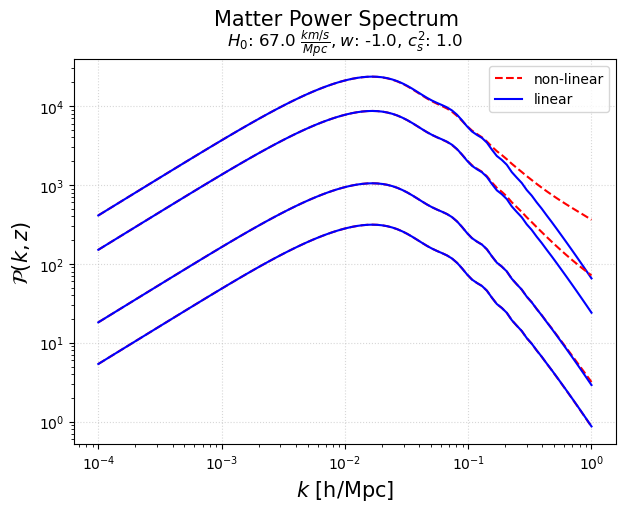

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), sharey=True)

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh_nl, PK_nl[iz, :], color='r', ls='--')
    ax.loglog(kh, PK[iz, :], color='b')


ax.legend(['non-linear', 'linear'], loc='upper right')
ax.set_ylabel(r"$\mathcal{P}(k, z)$", fontsize=15)
ax.set_xlabel(r"$k$ [h/Mpc]", fontsize=15)
ax.set_title(f"$H_0$: {pars.H0} $\\frac{{km/s}}{{Mpc}}, $" + 
                f"$w$: {pars.DarkEnergy.w}, $c_s^2$: {pars.DarkEnergy.cs2}")
ax.grid(alpha=0.5, ls=':')
fig.suptitle("Matter Power Spectrum", fontsize=15)

plt.show()

## P6

Angular Power Spectrum

In [119]:
powers = results.get_cmb_power_spectra(pars,CMB_unit='muK')
#for i in powers: print(i)

In [120]:
unlesed = powers['unlensed_scalar']
ells = np.arange(unlesed[:,0].shape[0])

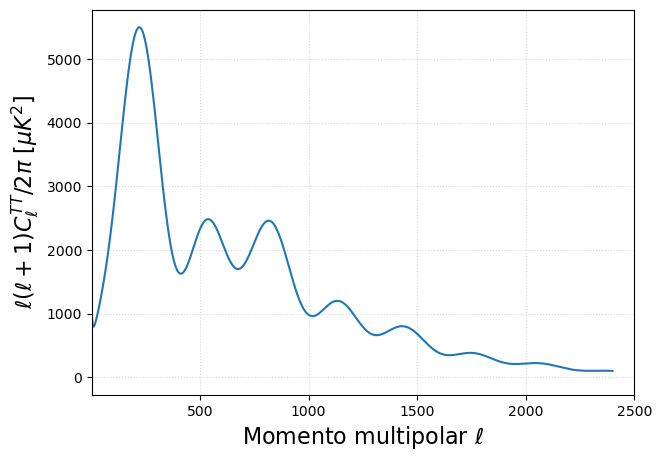

In [121]:
plt.figure(figsize=(7, 5))
plt.plot(ells, unlesed[:, 0])  # 0: TT, 1: EE, 2: BB, 3: TE
plt.xlabel(r'Momento multipolar $\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()